# Classification with Logistic Regression Based on Genres

Let's import necessary libraries and load the dataset. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [2]:
input_data_path = "features_msd_lda_sp.csv"
dataset = pd.read_csv(input_data_path)
dataset.drop(["Unnamed: 0"], 1, inplace=True)
dataset

,genre,track_id,artist_name,title,loudness_x,tempo_x,time_signature,key_x,mode_x,duration,...,key_y,loudness_y,mode_y,speechiness,acousticness,instrumentalness,liveness,valence,tempo_y,id
0,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,...,4,-9.009,0,0.0806,0.32600,0.014300,0.2240,0.4930,149.356,2KsnSzoJlmfT44jFOqRP1E
1,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,...,10,-11.838,0,0.0359,0.90300,0.000000,0.1810,0.1930,80.510,4qV4ErzHMz4XYGWxMkOFBw
2,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,...,7,-7.034,1,0.0303,0.36100,0.002490,0.1170,0.4670,117.720,2o2jnahWDsvyo8v0vV3dif
3,classic pop and rock,TRSIZRN128F427DB95,Blue Oyster Cult,Morning Final,-11.952,100.901,1,0,1,254.17098,...,9,-6.756,0,0.0659,0.05170,0.033700,0.1520,0.5050,100.563,4YsdlcE3GqCHpZD4jNDJgD
4,classic pop and rock,TRDYTEO128F427DB90,Blue Oyster Cult,The Revenge Of Vera Gemini,-11.839,132.361,4,2,1,230.32118,...,9,-7.110,1,0.0659,0.00182,0.000002,0.0814,0.6570,132.659,4aumrXau5uVKj8xXcQELP3
5,classic pop and rock,TRKSICM128F427DB8B,Blue Oyster Cult,True Confessions,-13.760,121.001,4,10,1,177.55383,...,10,-7.493,1,0.0433,0.10200,0.000009,0.0539,0.8140,121.065,6sH5tkQoXL3YKV0hpXZoWj
6,classic pop and rock,TRJPXIV128F426697A,Blue Oyster Cult,Redeemed,-10.799,185.836,4,2,1,231.39220,...,11,-9.794,0,0.0374,0.08460,0.001370,0.3210,0.5170,186.627,1P37l3UBUo49cqATq6Qccz
7,classic pop and rock,TRXWSIN128F4265A40,Blue Oyster Cult,Workshop Of The Telescopes,-11.413,120.171,4,9,1,241.16200,...,2,-8.954,1,0.1140,0.25700,0.011700,0.1110,0.3540,120.413,55f36XW2w1moYF70wsaHLB
8,classic pop and rock,TRNVQPE128F426BBD2,Blue Oyster Cult,Godzilla,-12.083,88.548,4,6,0,469.89016,...,4,-7.719,1,0.0554,0.16400,0.000008,0.6050,0.6960,184.024,6N0AnkdDFZUetw8KAGHV7e
9,classic pop and rock,TRUUZXH128F426C1AD,Blue Oyster Cult,E.T.I. (Extra Terrestrial Intelligence),-7.264,97.298,4,9,1,226.03710,...,9,-5.875,1,0.0486,0.24500,0.002490,0.4350,0.6860,97.335,5KBdHzTROSlD3dACh91sZx


Let's look at which genres are in dataset.

In [3]:
genres = dataset.genre.unique()
genres

array(['classic pop and rock', 'punk', 'folk', 'pop',
       'dance and electronica', 'metal', 'jazz and blues', 'classical',
       'hip-hop', 'soul and reggae'], dtype=object)

Since we cannot use string features in random forest, we're gonna drop corresponding columns

In [4]:
string_features = ["track_id", "id", "artist_name", "title"]

Let's define a function for dividing data into input and output for logistic regression

In [5]:
def create_input_and_label_for_genre(dataset, genre):
    label = np.where(dataset['genre']==genre, 1, 0)
    feature = dataset.loc[:, dataset.columns != 'genre']
    feature.drop(string_features, 1, inplace = True)
    return feature.as_matrix(), label

Now it's time to create Logistic Regression

In [6]:
def get_logistic_regression():
    return LogisticRegression()

Below we are gonna make logistic regression for each genre in dataset

In [7]:
train_acc_list = []
test_acc_list = []
cv_acc_list = []
for genre in genres:
    print("Logistic regression based on genre: "+ genre)
    X, y = create_input_and_label_for_genre(dataset.copy(), genre)
    clf = get_logistic_regression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf.fit(X_train, y_train)
    cv = 10
    cross_validation_scores = cross_val_score(clf, X, y, cv=cv)
    #print("Cross validation scores", cross_validation_scores)
    mean_cvs = sum(cross_validation_scores)/len(cross_validation_scores)
    predictions = clf.predict(X_test)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, predictions)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    cv_acc_list.append(mean_cvs)
    print("Train Accuracy :: ", train_acc)
    print("Cross validation Accuraccy :: ", mean_cvs)
    print("Test Accuracy  :: ", test_acc)
    
overall_train_acc = sum(train_acc_list)/len(train_acc_list)
overall_test_acc = sum(test_acc_list)/len(test_acc_list)
overall_cv_acc = sum(cv_acc_list)/len(cv_acc_list)
print("Overall results")    
print("Train Accuracy :: ", overall_train_acc)
print("Test Accuracy  :: ", overall_test_acc)
print("CV Accuracy    :: ", overall_cv_acc)

Logistic regression based on genre: classic pop and rock


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.706628571429
Cross validation Accuraccy ::  0.657847862063
Test Accuracy  ::  0.709290366815
Logistic regression based on genre: punk


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.963885714286
Cross validation Accuraccy ::  0.927809501132
Test Accuracy  ::  0.958176208433
Logistic regression based on genre: folk


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.833142857143
Cross validation Accuraccy ::  0.824638610973
Test Accuracy  ::  0.842303736716
Logistic regression based on genre: pop


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.969371428571
Cross validation Accuraccy ::  0.952682162157
Test Accuracy  ::  0.964346931779
Logistic regression based on genre: dance and electronica


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.965485714286
Cross validation Accuraccy ::  0.963828688005
Test Accuracy  ::  0.968460747343
Logistic regression based on genre: metal


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.978514285714
Cross validation Accuraccy ::  0.969916118061
Test Accuracy  ::  0.976002742544
Logistic regression based on genre: jazz and blues


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.977371428571
Cross validation Accuraccy ::  0.97728639308
Test Accuracy  ::  0.978745286253
Logistic regression based on genre: classical


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.998285714286
Cross validation Accuraccy ::  0.996742611643
Test Accuracy  ::  0.997943092218
Logistic regression based on genre: hip-hop


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.995771428571
Cross validation Accuraccy ::  0.992799334768
Test Accuracy  ::  0.995886184436
Logistic regression based on genre: soul and reggae


/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Train Accuracy ::  0.9384
Cross validation Accuraccy ::  0.929801594124
Test Accuracy  ::  0.933836133013
Overall results
Train Accuracy ::  0.932685714286
Test Accuracy  ::  0.932499142955
CV Accuracy    ::  0.919335287601


Now we're gonna create a function for dividing data into input and output for multiclass classification

In [8]:
def create_input_and_label_for_multiclass(dataset, genres):
    label = dataset[['genre']]
    for index, genre in zip(range(0, len(genres)),genres):
        label.loc[dataset['genre'] == genre, 'genre'] = index 
    feature = dataset.loc[:, dataset.columns != 'genre']
    feature.drop(string_features, 1, inplace = True)
    return feature.as_matrix(), label['genre']

Below, we're gonna get results for multiclass classification with Logistic Regression

In [9]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(predictions, label, predict_names, label_names):
    mat = confusion_matrix(predictions, label)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=predict_names,
            yticklabels=label_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    return plt

/media/gokce/Data/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/media/gokce/Data/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Results for classifier	: Logistic Regression multiclass
Train Accuracy			::  0.6632
Cross validation Accuracy	::  0.640646272809
Test Accuracy			::  0.668837847103


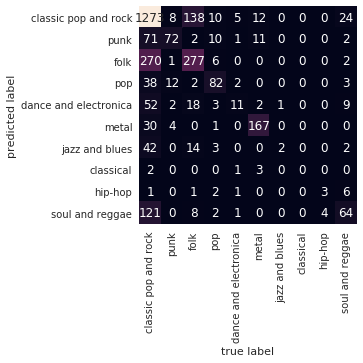

Results for classifier	: Logistic Regression One Vs All
Train Accuracy			::  0.661828571429
Cross validation Accuracy	::  0.642447457515
Test Accuracy			::  0.671237572849


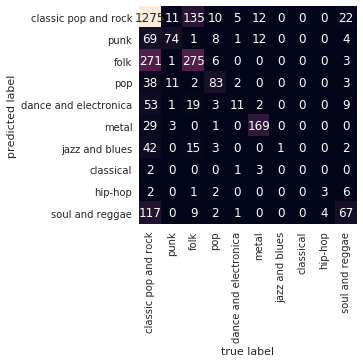

In [10]:
X, y = create_input_and_label_for_multiclass(dataset.copy(), genres)

onevsall = OneVsRestClassifier(LogisticRegression())
multiclass = get_logistic_regression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
onevsall.fit(X_train,y_train)
multiclass.fit(X_train,y_train)
cv = 10
#cross_val_score_multiclass = cross_val_score(multiclass X, y, cv=cv)
#cross_val_score_onevsall = cross_val_score(onevsall, X, y, cv=cv)
for classifier, classifier_name in zip([multiclass, onevsall], ["Logistic Regression multiclass", "Logistic Regression One Vs All"]):
    cross_validation_scores = cross_val_score(classifier, X, y, cv=cv)
    mean_cvs = sum(cross_validation_scores)/len(cross_validation_scores)
    predictions = classifier.predict(X_test)
    train_acc = accuracy_score(y_train, classifier.predict(X_train))
    test_acc = accuracy_score(y_test, predictions)
    print("Results for classifier\t: " + classifier_name)
    print("Train Accuracy\t\t\t:: ", train_acc)
    print("Cross validation Accuracy\t:: ", mean_cvs)
    print("Test Accuracy\t\t\t:: ", test_acc)
    conf_mat = plot_confusion_matrix(predictions, y_test, genres, genres)
    conf_mat.show()
    